In [1]:
# imports 
import pandas as pd 
import numpy as np 
%matplotlib inline

In [2]:
# reading in files 
transaction_dataset = pd.read_csv('datasets/bs140513_032310.csv')
network_dataset = pd.read_csv('datasets/bsNET140513_032310.csv')

# Cleaning out the data set

In [3]:
# method that removes quotations 
def remove_quotations(x):
    return x.strip("''")

# method that replaces age null value w/ -1 
def age_null(x):
    if x == 'U':
        return -1 
    return x 

# method that encodes gender into a number 
def gender_switch(x):
    if x == 'M':
        return 0
    if x == 'F':
        return 1
    


# method that cleans dataframe and returns cleaned version 
def clean_transaction(df):
    transaction_dataset = df.copy()
    transaction_dataset['customer'] = transaction_dataset['customer'].apply(remove_quotations) # remove quotation 
    transaction_dataset['age'] = transaction_dataset['age'].apply(remove_quotations).apply(age_null) # remove quotations and replaces null
    transaction_dataset['gender'] = transaction_dataset['gender'].apply(remove_quotations).apply(gender_switch) # remove quotation and encode gender
    transaction_dataset['zipcodeOri'] = transaction_dataset['zipcodeOri'].apply(remove_quotations).astype(int) # remove quotations 
    transaction_dataset['merchant'] = transaction_dataset['merchant'].apply(remove_quotations)
    transaction_dataset['zipMerchant'] = transaction_dataset['zipMerchant'].apply(remove_quotations).astype(int)
    transaction_dataset['category'] = transaction_dataset['category'].apply(remove_quotations)
    # transaction_dataset['category'] = transaction_dataset['category'].apply(encoder_categories)
    return transaction_dataset

In [4]:
clean_transaction = clean_transaction(transaction_dataset)

In [5]:
different_categories = clean_transaction['category'].unique().tolist()
category_dictionary = {} 
iterator = 0 
for i in different_categories:
    category_dictionary[i] = iterator
    iterator += 1  

# method that encodes the transaction categories into numbers 
def encoder_categories(x):
    return category_dictionary[x]

clean_transaction['category'] = clean_transaction['category'].apply(encoder_categories)

In [6]:
clean_transaction.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,0.0,28007,M348934600,28007,0,4.55,0
1,0,C352968107,2,0.0,28007,M348934600,28007,0,39.68,0
2,0,C2054744914,4,1.0,28007,M1823072687,28007,0,26.89,0
3,0,C1760612790,3,0.0,28007,M348934600,28007,0,17.25,0
4,0,C757503768,5,0.0,28007,M348934600,28007,0,35.72,0


In [7]:
clean_transaction.describe()

,step,gender,zipcodeOri,zipMerchant,category,amount,fraud
count,594643.000000,592950.000000,594643.0,594643.0,594643.000000,594643.000000,594643.000000
mean,94.986827,0.547373,28007.0,28007.0,0.785042,37.890135,0.012108
std,51.053632,0.497751,0.0,0.0,2.265378,111.402831,0.109369
min,0.000000,0.000000,28007.0,28007.0,0.000000,0.000000,0.000000
25%,52.000000,0.000000,28007.0,28007.0,0.000000,13.740000,0.000000
50%,97.000000,1.000000,28007.0,28007.0,0.000000,26.900000,0.000000
75%,139.000000,1.000000,28007.0,28007.0,0.000000,42.540000,0.000000
max,179.000000,1.000000,28007.0,28007.0,14.000000,8329.960000,1.000000


__Step__: Everything checks out with step, spread is correct and it seems like the data is relatively equallly spread out (mean and median are almost equal). 

__Gender__: Note that gender is the one variable that is missing some data. In general the data seems to be equally distributed (with some more females than males). 

__zipcodeOri__: Zipcode is all the exact same so we can remove it. 

__zipMerchant__: Zipcode is all the exact same so we can remove it. 

__amount__: The amounts are generally skewed to the right which means that heavier transactions tend to occur in this dataset.  

__fraud__: As mentioned from the description, a majority of this data is not fraudulent, which is evident by mean/50%. 

# Changing DataFrame

In [8]:
# dropping unnecessary columns 
clean_transaction = clean_transaction.drop(['zipcodeOri', 'zipMerchant'], axis=1)

Splitting into two groups: fraud/not fraud

In [9]:
not_fraud = clean_transaction[clean_transaction['fraud'] == 0]
not_fraud.describe()

,step,gender,category,amount,fraud
count,587443.000000,585757.000000,587443.000000,587443.000000,587443.0
mean,95.054077,0.545972,0.715232,31.847230,0.0
std,51.038755,0.497883,2.141128,31.470876,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,0.000000,0.000000,13.590000,0.0
50%,97.000000,1.000000,0.000000,26.610000,0.0
75%,139.000000,1.000000,0.000000,41.895000,0.0
max,179.000000,1.000000,14.000000,2144.860000,0.0


In [10]:
fraud = clean_transaction[clean_transaction['fraud'] == 1]
fraud.describe() 

,step,gender,category,amount,fraud
count,7200.000000,7193.000000,7200.000000,7200.000000,7200.0
mean,89.500000,0.661476,6.480833,530.926551,1.0
std,51.964331,0.473240,4.118898,835.587112,0.0
min,0.000000,0.000000,1.000000,0.030000,1.0
25%,44.750000,0.000000,2.000000,159.980000,1.0
50%,89.500000,1.000000,7.000000,319.175000,1.0
75%,134.250000,1.000000,8.000000,548.977500,1.0
max,179.000000,1.000000,14.000000,8329.960000,1.0


The biggest difference is that the gender of those who commit fraud tend to be male and the amount tends to be larger amounts.

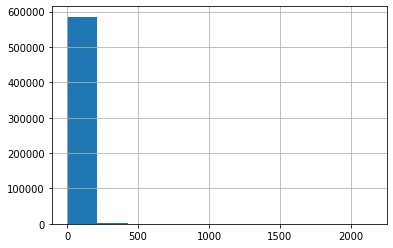

In [11]:
not_fraud['amount'].hist() # bit confused on what the axes are

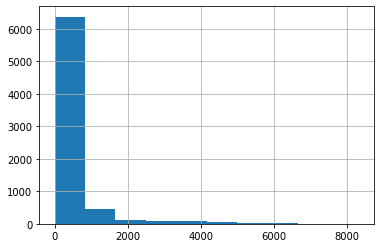

In [12]:
fraud['amount'].hist() # same^

Maybe divide it up into different categories and then test differences. Divide using one hot encoding.

In [14]:
corr_matrix = clean_transaction.corr()
corr_matrix.style.background_gradient(cmap='coolwarm') # not sure if reading it correctly, but category also is somewhat correlated?

,step,gender,category,amount,fraud
step,1,0.000381551,-0.0245922,-0.00796142,-0.0118981
gender,0.000381551,1,0.00996703,0.0129645,0.0254028
category,-0.0245922,0.00996703,1,0.268715,0.278354
amount,-0.00796142,0.0129645,0.268715,1,0.489967
fraud,-0.0118981,0.0254028,0.278354,0.489967,1


Basically no correlation with anything BESIDES the amount. Amount is crucial

In [15]:
# organizing by customer and step
clean_transaction_modded = clean_transaction.sort_values(['customer','step']).reset_index(drop='True')

In [16]:
clean_transaction_modded.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,30,C1000148617,5,0.0,M1888755466,2,143.87,0
1,38,C1000148617,5,0.0,M1741626453,7,16.69,0
2,42,C1000148617,5,0.0,M1888755466,2,56.18,0
3,43,C1000148617,5,0.0,M840466850,6,14.74,0
4,44,C1000148617,5,0.0,M1823072687,0,47.42,0


In [17]:
# number of customers in df
len(clean_transaction_modded['customer'].unique())

4112

In [18]:
# creating additional columns about differences b/w steps and amounts
column = clean_transaction_modded.groupby('customer')['fraud'].mean()
maybe = clean_transaction_modded.groupby('customer').agg({'step':'diff','amount':'diff'})
maybe.columns = ['diff_previous_step','diff_previous_amount']

In [19]:
# merging on proper customer id
clean_transaction_modded = clean_transaction_modded.join(maybe)

In [20]:
clean_transaction_modded.head()

,step,customer,age,gender,merchant,category,amount,fraud,diff_previous_step,diff_previous_amount
0,30,C1000148617,5,0.0,M1888755466,2,143.87,0,NaN,NaN
1,38,C1000148617,5,0.0,M1741626453,7,16.69,0,8.0,-127.18
2,42,C1000148617,5,0.0,M1888755466,2,56.18,0,4.0,39.49
3,43,C1000148617,5,0.0,M840466850,6,14.74,0,1.0,-41.44
4,44,C1000148617,5,0.0,M1823072687,0,47.42,0,1.0,32.68


In [21]:
# adding on mean spending amount
customer_mean_spend_amount = clean_transaction_modded.groupby('customer')[['amount']].mean().reset_index()
customer_mean_spend_amount.columns = ['customer','mean_amount']
customer_mean_spend_amount.head()

,customer,mean_amount
0,C1000148617,35.091908
1,C100045114,90.336239
2,C1000699316,38.154894
3,C1001065306,204.754667
4,C1002658784,34.253282


In [22]:
final_df = pd.merge(clean_transaction_modded,customer_mean_spend_amount)
final_df['diff_from_mean_amount'] = final_df['amount']-final_df['mean_amount']
final_df.head()

,step,customer,age,gender,merchant,category,amount,fraud,diff_previous_step,diff_previous_amount,mean_amount,diff_from_mean_amount
0,30,C1000148617,5,0.0,M1888755466,2,143.87,0,NaN,NaN,35.091908,108.778092
1,38,C1000148617,5,0.0,M1741626453,7,16.69,0,8.0,-127.18,35.091908,-18.401908
2,42,C1000148617,5,0.0,M1888755466,2,56.18,0,4.0,39.49,35.091908,21.088092
3,43,C1000148617,5,0.0,M840466850,6,14.74,0,1.0,-41.44,35.091908,-20.351908
4,44,C1000148617,5,0.0,M1823072687,0,47.42,0,1.0,32.68,35.091908,12.328092


In [23]:
# doing markov statistics

In [24]:
validity_counts = pd.DataFrame({'initial':final_df['fraud']})
validity_counts['next'] = validity_counts['initial'].shift(-1)
validity_counts = validity_counts[:-1] # remove last one since it has nothing to compare to
validity_counts.head()

,initial,next
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [25]:
counts = pd.DataFrame(validity_counts['initial'].value_counts()).reset_index()
counts.columns = ['initial','total_count']
counts.head()

,initial,total_count
0,0,587442
1,1,7200


In [26]:
result = pd.DataFrame(validity_counts.groupby('initial')['next'].value_counts())
result.columns = ['count']
result = result.reset_index()
result = result.merge(counts)
result['proportion'] = result['count']/result['total_count']
result.pivot(index='initial',columns = 'next',values = 'proportion') 

next,0.0,1.0
initial,,
0,0.992117,0.007883
1,0.643194,0.356806


In [ ]:
# an explanation of the table(s) above would be helpful in interpreting the calculations you performed